In [19]:
#Importing all the necessary Libraries

import math
import numpy as np
import pandas as pd
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

In [20]:
# Creating a Datframe of dataset
df = pdd.DataReader('AAPL', data_source='yahoo', start='2000-01-01', end='30-05-2021')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.788183
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.858137
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.785788
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.797286
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.728290
...,...,...,...,...,...,...
2021-05-24,127.940002,125.940002,126.010002,127.099998,63092900.0,126.909851
2021-05-25,128.320007,126.320000,127.820000,126.900002,72009500.0,126.710159
2021-05-26,127.389999,126.419998,126.959999,126.849998,56575900.0,126.660225


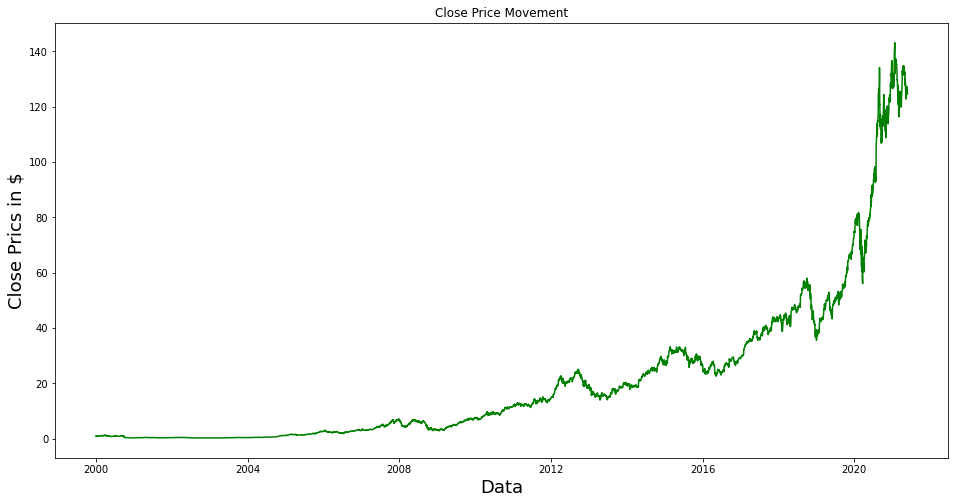

In [21]:
# PLotting the graph for the previous years' Stock
plt.figure(figsize = (16,8))
plt.title("Close Price Movement")
plt.plot(df['Close'],color="Green")
plt.xlabel('Data',fontsize = 18)
plt.ylabel('Close Prics in $', fontsize=18)
plt.show()

In [22]:
# Filtering the Dataset
data=df.filter(['Close'])
dataset=data.values
len(dataset)
data


,Close
Date,
1999-12-31,0.917969
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
2000-01-06,0.848214
...,...
2021-05-24,127.099998
2021-05-25,126.900002
2021-05-26,126.849998


In [23]:
# Creating the data size of training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

3771

In [24]:
# Analyzing the dataset
dataset = df.iloc[:1762, 1:2].values
dataset = df.iloc[:, 1:2].values

In [25]:
# Optimization
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00468497],
       [0.00482335],
       [0.00479172],
       ...,
       [0.89407897],
       [0.88458506],
       [0.88083001]])

In [26]:
# Training
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)

[array([0.00468497, 0.00482335, 0.00479172, 0.00490638, 0.0044003 ,
       0.00443194, 0.00438449, 0.00411564, 0.0038626 , 0.00424216,
       0.00467706, 0.00474427, 0.0049301 , 0.0055706 , 0.00536105,
       0.0050408 , 0.00486684, 0.00533338, 0.00515941, 0.00475614,
       0.00436867, 0.0047166 , 0.00452682, 0.00473241, 0.00494591,
       0.0050922 , 0.00542827, 0.00550338, 0.00534919, 0.00523849,
       0.00526221, 0.00567735, 0.00548361, 0.00554688, 0.00540454,
       0.00513964, 0.00541245, 0.00545989, 0.0053571 , 0.00524639,
       0.00551129, 0.00588689, 0.00602527, 0.00598178, 0.00629807,
       0.00605295, 0.00589085, 0.00587108, 0.00604504, 0.00595015,
       0.00560222, 0.00561013, 0.00563385, 0.00595806, 0.00613202,
       0.00608458, 0.00671321, 0.00724696, 0.00696229, 0.00704928])]
[0.007065089935215251]
[array([0.00468497, 0.00482335, 0.00479172, 0.00490638, 0.0044003 ,
       0.00443194, 0.00438449, 0.00411564, 0.0038626 , 0.00424216,
       0.00467706, 0.00474427, 0.00

In [27]:
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(3711, 60, 1)

In [28]:
# Creation of Model
model=Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
# Compilation Of the Model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [30]:
# Fitting the Model
model.fit(x_train, y_train, batch_size=5, epochs = 10 )

Epoch 1/10
743/743 [==============================] - 33s 44ms/step - loss: 4.3811e-05
Epoch 2/10
743/743 [==============================] - 35s 48ms/step - loss: 1.6476e-05
Epoch 3/10
743/743 [==============================] - 35s 47ms/step - loss: 1.5325e-05
Epoch 4/10
743/743 [==============================] - 36s 48ms/step - loss: 1.4014e-05
Epoch 5/10
743/743 [==============================] - 35s 48ms/step - loss: 1.0040e-05
Epoch 6/10
743/743 [==============================] - 39s 52ms/step - loss: 1.1715e-05
Epoch 7/10
743/743 [==============================] - 39s 53ms/step - loss: 6.5052e-06
Epoch 8/10
743/743 [==============================] - 37s 50ms/step - loss: 7.2004e-06
Epoch 9/10
743/743 [==============================] - 40s 54ms/step - loss: 6.0098e-06
Epoch 10/10
743/743 [==============================] - 40s 54ms/step - loss: 5.1758e-06


In [31]:
# Testing
test_data= scaled_data[training_data_size - 60:, :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [32]:
x_test= np.array(x_test)

In [33]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [34]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [35]:
# Accuracy
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.0777353898133382

<ipython-input-36-56e3402751ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


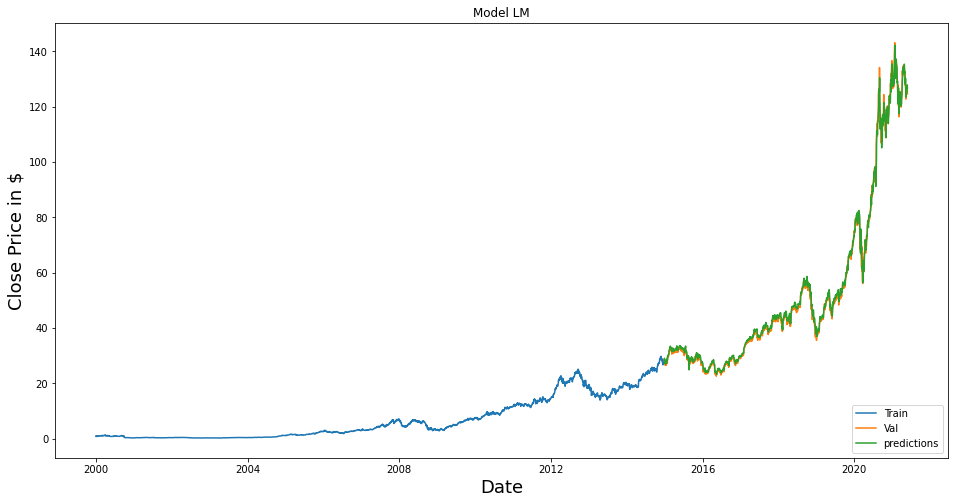

In [36]:
# Plotting the Graph
train=data[:training_data_size]
valid=data[training_data_size:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title("Model LM")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()